In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import os
import re
import sklearn
import sys

from sklearn.preprocessing import MultiLabelBinarizer
from joblib import Parallel, delayed
from tqdm import *

%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
src_dir = os.path.join(os.getcwd(), os.pardir, '../src')
sys.path.append(src_dir)

In [3]:
%aimport data.movielens_20m_imdb
%aimport helpers.labels

from data.movielens_20m_imdb import load_df_or_get_from_cache
from helpers.labels import truncate_labels

In [4]:
INTERIM_DATA_ROOT = os.path.abspath("../../data/interim/movielens-ml20m-imdb/")
PATH_TO_FILE = os.path.abspath('../../data/processed/movielens-20m-imdb-tags-and-synopses-2017-12-13.csv')

In [5]:
docs_df = load_df_or_get_from_cache(PATH_TO_FILE,INTERIM_DATA_ROOT)

## number of documents

In [6]:
len(docs_df)

6710

In [7]:
docs_df.head()

,movie_id,title,synopsis,tags,num_tags
0,1,Toy Story (1995),A boy called Andy Davis (voice: John Morris) u...,"warm,very-good,3d,heroic-mission,kids-and-fami...",59
1,2,Jumanji (1995),The film begins in 1869 in the town of Brantfo...,"time,dynamic-cgi-action,saturn-award-best-spec...",19
2,6,Heat (1995),An inbound Blue Line train pulls in to Firesto...,"slick,relationships,who-cares-dvds,cliched,gun...",57
3,7,Sabrina (1995),"Sabrina Fairchild (Julia Ormond), is the Larra...","romance,chick-flick,great-cast,greg-kinnear,no...",13
4,8,Tom and Huck (1995),The film opens with Injun Joe (Eric Schweig) a...,"adapted-frombook,based-on-a-book,seen",3


In [8]:
docs_df.describe(include=['number'])

,movie_id,num_tags
count,6710.000000,6710.000000
mean,41263.124888,12.214605
std,39409.134389,14.369509
min,1.000000,1.000000
25%,4106.250000,3.000000
50%,31251.000000,7.000000
75%,74531.500000,16.000000
max,131082.000000,189.000000


In [9]:
docs_df.describe(include=['object'])

,title,synopsis,tags
count,6710,6710,6710
unique,6710,6710,6121
top,Jesus Christ Vampire Hunter (2001),"In a small New England town, four elderly men ...",bd-r
freq,1,1,104


In [10]:
labelsets = [tagset.split(',') for tagset in docs_df["tags"].values]

In [22]:
mlb = MultiLabelBinarizer()
tag_assignments = mlb.fit_transform(labelsets)

### number of tags per document

In [26]:
total_number_of_tags = len(mlb.classes_)
print("total number of unique tags: "+str(total_number_of_tags))

total number of unique tags: 2138


In [12]:
tags_per_document = tag_assignments.sum(axis=1)

In [13]:
tags_per_document.mean()

12.214605067064083

In [14]:
tags_per_document.max()

189

In [15]:
tags_per_document.min()

1

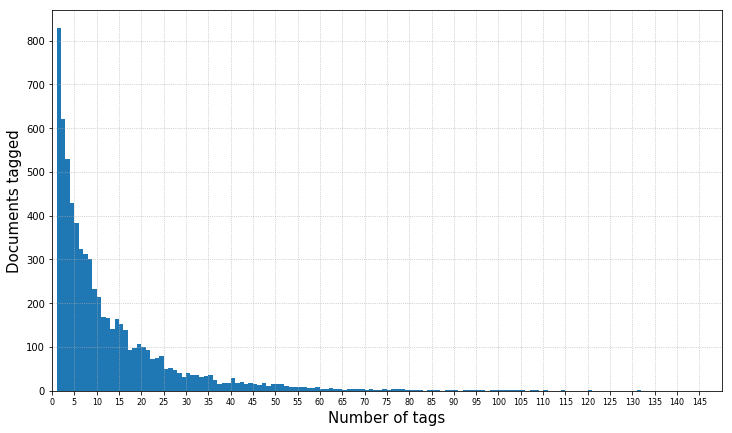

In [47]:
plt.hist(tags_per_document,bins=np.arange(1.0,150,1),rwidth=1.0)
plt.gcf().set_size_inches(12,7)
# plt.gca().set_title('number of tags per document',fontsize=20)
plt.xlabel('Number of tags',fontsize=15)
plt.ylabel('Documents tagged', fontsize=15)
plt.gca().set_xlim(0,150)

plt.gca().grid(True)
gridlines = plt.gca().get_xgridlines() + plt.gca().get_ygridlines()
for line in gridlines:
    line.set_linestyle(':')
    line.set_linewidth(0.7)

plt.setp(plt.gca().get_xticklabels(), fontsize=8)
plt.xticks(np.arange(0, 150, 5))
plt.show()

## number of times each tag was given to a movie

(not counting multiple assignments)

In [17]:
documents_per_tag = tag_assignments.sum(axis=0)

In [18]:
documents_per_tag.mean()

38.334892422825071

In [19]:
documents_per_tag.max()

854

In [20]:
documents_per_tag.min()

10

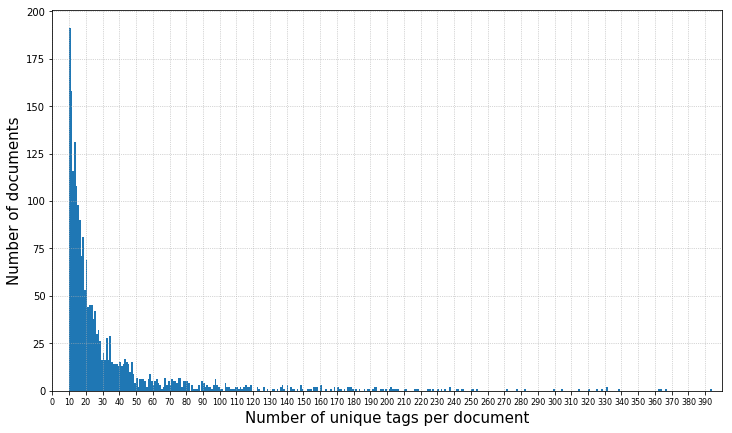

In [50]:
plt.hist(documents_per_tag,bins=np.arange(1.0,400,1),rwidth=1.0)

plt.gcf().set_size_inches(12,7)
# plt.gca().set_title('Number of documents per tag',fontsize=20)
plt.gca().set_xlim(0,400)
plt.xlabel('Number of unique tags per document',fontsize=15)
plt.ylabel('Number of documents', fontsize=15)
plt.xticks(np.arange(0, 400, 10))

plt.gca().grid(True)
gridlines = plt.gca().get_xgridlines() + plt.gca().get_ygridlines()
for line in gridlines:
    line.set_linestyle(':')
    line.set_linewidth(0.7)

plt.setp(plt.gca().get_xticklabels(), fontsize=8)
plt.show()